In [ ]:
'''
Соколов Михаил Павлович
michael-0801@yandex.ru

https://github.com/smp888/P.git

Проект

Тема: Поиск шаблонов в данных о студентах контрактной формы обучения
'''


In [88]:
# Загрузка набора данных:
# Институты, в которых учились студенты, учившиеся в нескольких инстутутах

with open('inst2.txt', 'r') as f:
  data = f.read().splitlines()

# Подготовка и анализ набора данных

import re

max=0
sum=0
for i in range(len(data)):
  data[i] = re.split(",", data[i])
  data[i]=list(set(data[i]))
  if len(data[i])>max:
    max=len(data[i])
  if (len(data[i])>1):
    sum=sum+len(data[i])
data = [x for x in data if len(x)>1]
print("Количество транзакций:")
print(len(data))
print("Максимальная длина транзакции:")
print(max)
print("Средняя длина транзакции:")
print(sum/len(data))
print("Пример транзакции:")
print(data[8])

Количество транзакций:
2893
Максимальная длина транзакции:
4
Средняя длина транзакции:
2.0525406152782577
Пример транзакции:
['ПИ', 'ВШЭКН']


In [89]:
# Загрузка набора данных:
# Институт, Вид обучения, Срок обучения, Тип заказчика

with open('4.txt', 'r') as f:
  data2 = f.read().splitlines()

# Подготовка и анализ набора данных

import re

sum=0
for i in range(len(data2)):
  data2[i] = re.split(";", data2[i])
  sum=sum+len(data2[i])

print("Количество транзакций:")
print(len(data2))
print("Пример транзакции:")
print(data2[8])

Количество транзакций:
58250
Пример транзакции:
['ПИ', 'Заочная', '5 лет', 'Сам']


In [8]:
# Установка библиотеки для алгоритма Apriori
!pip install efficient-apriori
from efficient_apriori import apriori

In [150]:
# Институты
itemsets, rules = apriori(data, min_support=0.01, min_confidence=0.4)
for i in range(len(itemsets)):
  print(itemsets[i+1]) 
for i in range(len(rules)):
  print(rules[i]) 

{('ИОДО',): 1060, ('ВШЭУ',): 1436, ('ПИ',): 655, ('АСИ',): 235, ('ВШЭКН',): 212, ('ИСТС',): 677, ('ЮИ',): 883, ('ВМБШ',): 135, ('ИМСГН',): 236, ('ИЛиМК',): 340, ('ИЕТН',): 68}
{('АСИ', 'ВШЭУ'): 56, ('АСИ', 'ИОДО'): 72, ('АСИ', 'ПИ'): 49, ('ВМБШ', 'ВШЭУ'): 38, ('ВМБШ', 'ИСТС'): 31, ('ВШЭКН', 'ВШЭУ'): 51, ('ВШЭКН', 'ПИ'): 85, ('ВШЭУ', 'ИЛиМК'): 119, ('ВШЭУ', 'ИМСГН'): 67, ('ВШЭУ', 'ИОДО'): 400, ('ВШЭУ', 'ИСТС'): 302, ('ВШЭУ', 'ПИ'): 167, ('ВШЭУ', 'ЮИ'): 309, ('ИЛиМК', 'ИМСГН'): 59, ('ИЛиМК', 'ИСТС'): 60, ('ИЛиМК', 'ЮИ'): 36, ('ИМСГН', 'ИСТС'): 42, ('ИМСГН', 'ЮИ'): 30, ('ИОДО', 'ИСТС'): 60, ('ИОДО', 'ПИ'): 248, ('ИОДО', 'ЮИ'): 280, ('ИСТС', 'ПИ'): 35, ('ИСТС', 'ЮИ'): 178, ('ПИ', 'ЮИ'): 72}
{ВШЭКН} -> {ПИ} (conf: 0.401, supp: 0.029, lift: 1.771, conv: 1.291)
{ИСТС} -> {ВШЭУ} (conf: 0.446, supp: 0.104, lift: 0.899, conv: 0.909)


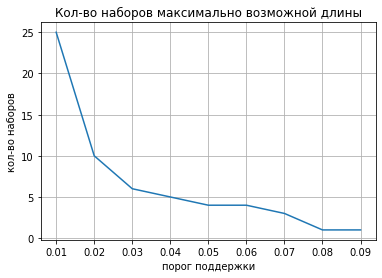

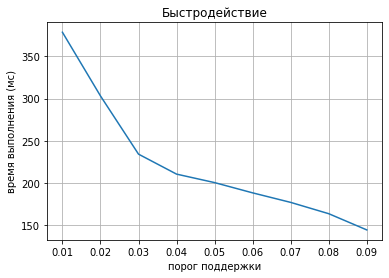

In [147]:
# Выбор оптимального количества наборов длины 4 в наборе №2

import numpy as np
import matplotlib.pyplot as plt
import time

x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
y = []
z = []

for i in x:
  start_time = time.time()
  itemsets, rules = apriori(data2, min_support=i) 
  z=z+[(time.time() - start_time)*1000]
  if len(itemsets)==4:
    y=y+[len(itemsets[len(itemsets)])]
  else:
    y=y+[0]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('кол-во наборов')

ax.set_title('Кол-во наборов максимально возможной длины')

plt.show()

fig, ax = plt.subplots()

ax.plot(x, z)
ax.grid()

ax.set_xlabel('порог поддержки')
ax.set_ylabel('время выполнения (мс)')

ax.set_title('Быстродействие')

plt.show()

In [148]:
# Наиболее частые наборы: Институт, Вид обучения, Срок обучения, Тип заказчика
# Порог поддержки выбран 0.04
itemsets, rules = apriori(data2, min_support=0.04)  
print(itemsets[len(itemsets)]) 

{('4 года', 'ВШЭУ', 'Дневная', 'Физ. лицо'): 4154, ('5 лет', 'ВШЭУ', 'Дневная', 'Физ. лицо'): 2510, ('5 лет', 'ВШЭУ', 'Заочная', 'Сам'): 3868, ('5 лет', 'Заочная', 'ИОДО', 'Сам'): 5308, ('5 лет', 'Заочная', 'ПИ', 'Сам'): 4252}
